# Loading Dataset (never run this again pls)

In [1]:
# import pandas as pd
# import os, re
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split

# sns.set_theme(style = "dark", 
#         color_codes = True,
#         font_scale = 1.5)

In [2]:
# def load_partition_folder(partition="train"):
#     partition_folder = os.path.join(os.getcwd(),'image_csv',partition)
    

#     image_indexes,images,labels = [],[],[]

#     for image_fname in os.listdir(partition_folder):
#         image_re = re.match(r'([0-9]+)_([0-9]+)\.csv',image_fname)
#         image_indexes.append(image_re.group(1))
#         labels.append(image_re.group(2))
#         images.append(np.loadtxt(os.path.join(partition_folder,image_fname),delimiter=',',dtype=float))

#     image_df = pd.DataFrame({'img_index':image_indexes,'image':images,'label':labels})

#     image_df["img_index"] = image_df["img_index"].astype(int)
#     image_df["label"] = image_df["label"].astype(int)

#     return image_df.sort_values(by="img_index").reset_index(drop=True).drop(['img_index'],axis=1)

In [3]:
# train_df = load_partition_folder()
# train_df.head()

In [4]:
# train_df.info()

In [5]:
# test_df = load_partition_folder(partition='test')
# test_df.head()

In [6]:
# test_df.info()

In [7]:
# X_train = train_df['image']
# y_train = train_df['label']

# X_test = test_df['image']
# y_test = test_df['label']

In [8]:
# X_train.shape

In [9]:
# y_train.shape

In [10]:
# X_test.shape

In [11]:
# y_test.shape

In [12]:
# test_df

In [13]:
# train_df

In [14]:
# # fixing the dataset
# train_df.to_pickle("Training_Data.pkl")
# test_df.to_pickle("Testing_data.pkl")

# Buidling the model

In [1]:
import pandas as pd
import os, re
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split

sns.set_theme(style = "dark", 
        color_codes = True,
        font_scale = 1.5)

In [2]:
# Loading from saved file
training_df = pd.read_pickle("Training_data.pkl")
testing_df = pd.read_pickle("Testing_data.pkl")
# training_df.drop(training_df.columns[[0]], axis = 1, inplace=True)
# testing_df.drop(testing_df.columns[[0]], axis = 1,inplace=True)

display(training_df)
display(testing_df)

,image,label
0,"[[3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0,...",3
1,"[[2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0,...",0
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
3,"[[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",1
4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
...,...,...
10613,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
10614,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3
10615,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
10616,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0


,image,label
0,"[[2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
1,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
2,"[[1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",0
3,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
4,"[[1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
...,...,...
1400,"[[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0,...",3
1401,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3
1402,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",3
1403,"[[2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0,...",3


In [3]:
X_train = training_df['image']
y_train = training_df['label']

X_test = testing_df['image']
y_test = testing_df['label']

# number of classes - 4 
num_classes = testing_df['label'].nunique()

In [4]:
print(num_classes)

4


In [5]:
from keras.utils import to_categorical

X_train_1 = np.array([np.array(img) for img in X_train])  # Ensure image_data is correctly formatted
y_train_1 = np.array(to_categorical(y_train))

display(X_train_1)
display(y_train_1)

# y_train_test = to_categorical(y_train)

array([[[ 3.,  3.,  3., ...,  2.,  3.,  3.],
        [ 2.,  3.,  3., ...,  3.,  3.,  3.],
        [ 3.,  3.,  3., ...,  3.,  3.,  3.],
        ...,
        [ 9.,  9., 11., ..., 12., 12., 12.],
        [ 9.,  8.,  8., ..., 12., 12., 12.],
        [ 9.,  9.,  8., ..., 12., 11., 10.]],

       [[ 2.,  1.,  1., ...,  1.,  2.,  2.],
        [ 2.,  2.,  3., ...,  1.,  2.,  2.],
        [ 3.,  3.,  3., ...,  1.,  2.,  2.],
        ...,
        [ 2.,  3.,  3., ...,  1.,  1.,  1.],
        [ 2.,  2.,  3., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [6]:
X_train_1.shape


(10618, 240, 240)

In [7]:
X_train_rgb = np.repeat(X_train_1[..., np.newaxis], 3, -1)
print(X_train_rgb.shape)

(10618, 240, 240, 3)


In [8]:
y_train_1.shape

(10618, 4)

## Xception Model

In [9]:
from keras.applications import Xception
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, Input

input_shape = (240, 240, 3)

# Load the Xception model pre-trained on ImageNet without the top layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer and a logistic layer with 10 classes
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 119, 119,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 119, 119,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 119, 119,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 117, 117,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 117, 117,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 117, 117,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 117, 117,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 117, 117,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 117, 117,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 117, 117,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 117, 117,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 59, 59,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 59, 59,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 59, 59,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 59, 59,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 59, 59,    │          0 │ add[0][0]       

 Total params: 22,963,756 (87.60 MB)

 Trainable params: 2,102,276 (8.02 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [10]:
# Train the model
history = model.fit(X_train_rgb, y_train_1, epochs=10, batch_size=32, validation_split=0.2)

# # Fine-tuning (Optional)
# for layer in base_model.layers[-4:]:
#     layer.trainable = True

# model.compile(optimizer=Adam(1e-5),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

Epoch 1/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 898s 3s/step - accuracy: 0.5928 - loss: 1.1464 - val_accuracy: 0.6803 - val_loss: 0.7549
Epoch 2/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 1217s 5s/step - accuracy: 0.7488 - loss: 0.6395 - val_accuracy: 0.6761 - val_loss: 0.7407
Epoch 3/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 900s 3s/step - accuracy: 0.7865 - loss: 0.5381 - val_accuracy: 0.7236 - val_loss: 0.6812
Epoch 4/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 1457s 5s/step - accuracy: 0.8245 - loss: 0.4481 - val_accuracy: 0.7269 - val_loss: 0.6518
Epoch 5/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 1030s 4s/step - accuracy: 0.8320 - loss: 0.4273 - val_accuracy: 0.7349 - val_loss: 0.6648
Epoch 6/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 912s 3s/step - accuracy: 0.8452 - loss: 0.3955 - val_accuracy: 0.7161 - val_loss: 0.6905
Epoch 7/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 2035s 8s/step - accuracy: 0.8528 - loss: 0.3732 - val_accuracy: 0.7528 - val_loss: 0.6005
Epoch 8/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 1069s 4s/step - accuracy: 0.8594 - loss: 0.3548 - val

In [18]:
history = Out[10]

In [23]:
import json

# saving iteration history as json file
with open('training_history.json', 'w') as f:
    json.dump(history.history, f)

# Model saving
model.save('Xception_iter1.keras')

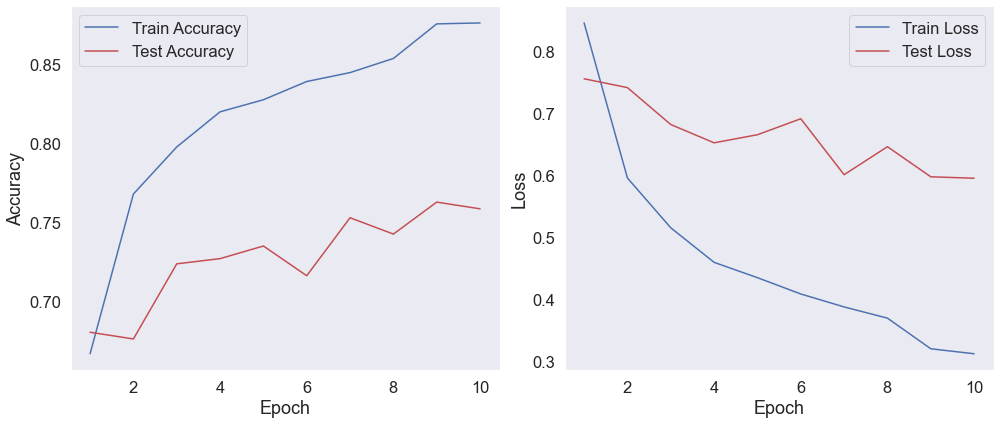

In [19]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc2)+1)
 
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
 
axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
 
axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
 
# Adjusting layout for better spacing
plt.tight_layout()
 
# Display the figure
plt.show()

In [20]:
import numpy as np

X_test_1 = np.array([np.array(img) for img in X_test])  # Ensure image_data is correctly formatted
y_test_1 = np.array(to_categorical(y_test))

display(X_test_1)
display(y_test_1)

array([[[ 2.,  2.,  1., ...,  1.,  1.,  1.],
        [ 2.,  2.,  1., ...,  1.,  1.,  1.],
        [ 2.,  2.,  2., ...,  1.,  1.,  1.],
        ...,
        [ 8.,  6.,  6., ...,  8.,  6.,  8.],
        [ 8.,  7.,  7., ...,  8.,  6.,  8.],
        [ 7.,  7.,  7., ...,  8.,  6.,  8.]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [ 2.,  2.,  2., ...,  1.,  1.,  1.],
        [ 2.,  2.,  2., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 2.,  2.,  2., ...,  1.,  1.,  1.],
        [ 2.,  3.,  3., ...,  1.,  1.,  2.],
        ...,
        [12., 12., 12., ..., 10., 10., 10.],
        [11., 11., 11., ..., 10., 10.,  9.],
        [ 9., 10., 10., ...,  9.,  9.,  8.]],

       ...,

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  2.,  2.],
        [ 1.,  1.,  1., ...,  1.,  2.,  2.

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [21]:
X_test_1
print(X_test_1.shape)
X_test_rgb = np.repeat(X_test_1[..., np.newaxis], 3, -1)
print(X_test_rgb.shape)

(1405, 240, 240)
(1405, 240, 240, 3)


In [22]:
predict_x = model.predict(X_test_rgb)
predict1 = np.argmax(predict_x, axis = 1)
print(predict1)

from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predict1, target_names = target_names))

44/44 ━━━━━━━━━━━━━━━━━━━━ 184s 4s/step
[0 1 0 ... 3 3 3]
              precision    recall  f1-score   support

     Class 0       0.84      0.83      0.84       309
     Class 1       0.78      0.83      0.80       335
     Class 2       0.98      0.94      0.96       399
     Class 3       0.91      0.90      0.90       362

    accuracy                           0.88      1405
   macro avg       0.88      0.88      0.88      1405
weighted avg       0.88      0.88      0.88      1405



In [ ]:
# Need hyperparametre tuning


## VG166 Model (just to see how it is)

### Backup

In [ ]:
# from keras.applications import VGG16
# from keras import layers, models

# # Modify the VGG16 model to accept a single channel
# vgg16_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

# # Create a new model and add the base model
# test_model = models.Sequential()
# test_model.add(vgg16_base_model)

# # Add custom top layers
# test_model.add(layers.Flatten())
# test_model.add(layers.Dense(512, activation='relu'))
# test_model.add(layers.Dropout(0.5))
# test_model.add(layers.Dense(num_classes, activation='softmax'))  # Adjust num_classes based on your dataset

# # Compile the model
# test_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Model summary
# test_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
# history = test_model.fit(X_train_rgb, y_train_1, epochs=10, batch_size=32, validation_split=0.2)#validation_data=validation_data)

Epoch 1/10
  8/266 ━━━━━━━━━━━━━━━━━━━━ 1:59:06 28s/step - accuracy: 0.1996 - loss: 5.9483

### Actual Model

In [ ]:
# Building VGG16 
from tf_keras.applications import VGG16
from tf_keras import layers, models

# Load VGG16 model without pretrained weights
vgg16_base_model = VGG16(weights=None, include_top=False, input_shape=(240, 240, 1))

# Create a new model and add the base model
model = models.Sequential()
model.add(vgg16_base_model)

# Add custom top layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))  # Adjust num_classes based on your dataset

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14713536  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 512)               12845568  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 27561156 (105.14 MB)
Trainable params: 27561156 (105.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Assuming train_data and validation_data are prepared using ImageDataGenerator or similar
history = model.fit(X_train_1, y_train_1, epochs=10, batch_size=32, validation_split=0.2)#validation_data=validation_data)

Epoch 1/10


  1/266 [..............................] - ETA: 3:48:35 - loss: 1.3808 - accuracy: 0.2812

## Inception Model (the more general Xception Model)

In [ ]:
# Building Inception model 
from tf_keras.applications import InceptionV3

# Load InceptionV3 model without the top fully connected layers
InceptionV3_base_model = InceptionV3(weights=None, include_top=False, input_shape=(240, 240, 1))

# Create a new model and add the base model
model = models.Sequential()
model.add(InceptionV3_base_model)

# Add custom top layers
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))  # Adjust num_classes based on your dataset

model.summary()

In [ ]:
# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
# Assuming train_data and validation_data are prepared using ImageDataGenerator or similar

history = model.fit(X_train_1, y_train_1, epochs=10, validation_split=0.2)#validation_data=validation_data)

In [ ]:
# from keras.applications import Xception
# from keras import layers, models

# # Load the Xception model pre-trained on ImageNet without the top layer
# base_model = Xception(weights='imagenet', include_top=False)

# # Add a global spatial average pooling layer
# x = base_model.output
# x = layers.GlobalAveragePooling2D()(x)

# # Add a fully-connected layer and a logistic layer with 10 classes
# x = layers.Dense(1024, activation='relu')(x)
# predictions = layers.Dense(10, activation='softmax')(x)

# # This is the model we will train
# model = Model(inputs=base_model.input, outputs=predictions)

# # Freeze all layers in the base model
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile the model
# model.compile(optimizer=Adam(),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model (Assuming train_data and validation_data are pre-defined datasets)
# model.fit(train_data,
#           epochs=10,
#           validation_data=validation_data)

# # Fine-tuning (Optional)
# for layer in base_model.layers[-4:]:
#     layer.trainable = True

# model.compile(optimizer=Adam(1e-5),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(train_data,
#           epochs=10,
#           validation_data=validation_data)


In [ ]:
# # Create a custom input layer
# input_layer = Input(shape=input_shape)

# # # Expand the single channel input to three channels
# # expanded_input = Conv2D(3, (3, 3), padding='same')(input_layer)